# 2.4 Exercises
## Data Curation and Exploration
We will now solve practical data analysis tasks. Try to reason through each step before running the code. 

## 1️⃣ Load and Inspect the Data
**Instructions:**
- Download data [here](https://github.com/leonardozaggia/psy126/tree/main/book/introduction/2_psy111_recap/data) and store it in your **Test_Theory_and_Costruction** folder.
- Load the `child_num_skills.csv` dataset
- Load the Yeatman (`subject.csv`) dataset  
- Print the shape and column names in a *clear format* for both datasets

In [ ]:
import pandas as pd

# Load datasets
df_c = pd.read_csv("./data/child_num_skills.csv")
df_y = pd.read_csv("./data/subjects.csv",
                  index_col=0)

# Inspect datasets
print("Child Numeracy Skills Shape:", df_c.shape)
print("Columns:", df_c.columns.tolist())
print()
print("Yeatman Dataset Shape:", df_y.shape)
print("Columns:", df_y.columns.tolist())

Child Numeracy Skills Shape: (341, 19)
Columns: ['Unnamed: 0', 'addit1', 'addit2', 'addit3', 'addit4', 'addit5', 'addit6', 'addit7', 'addit8', 'subtr1', 'subtr2', 'subtr3', 'subtr4', 'subtr5', 'subtr6', 'subtr7', 'subtr8', 'class', 'time']

Yeatman Dataset Shape: (77, 7)
Columns: ['subjectID', 'Age', 'Gender', 'Handedness', 'IQ', 'IQ_Matrix', 'IQ_Vocab']


## 2️⃣: Missing Data Detection with Logical indexing
**Instructions:**
- Create a loop that goes through each column in the `df_y`
- Store in an array whether the column had missing values or not:
    - Ex. `bool_arr = [True, False, ...]`
- Use this array to count how many columns have missing values
- Replace missing `Handedness` with `'Unknown'`
- Drop remaining rows with missing values
- How many participant did you have to exclude from your dataset?

In [4]:
bool_arr = []
for col in df_y.columns:
    has_na = df_y[col].isna().any()
    bool_arr.append(has_na)

print("Missing in columns:", bool_arr)
print("Columns with missing values:", sum(bool_arr))

# Replace and drop
before_drop = df_y.shape[0]
df_y['Handedness'] = df_y['Handedness'].fillna('Unknown')
df_y = df_y.dropna()
after_drop = df_y.shape[0]
print(f"Participants excluded due to missing data: {before_drop - after_drop}")
df_y.head()

Missing in columns: [np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.True_]
Columns with missing values: 5
Participants excluded due to missing data: 14


,subjectID,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
0,subject_000,20,Male,Unknown,139.0,65.0,77.0
1,subject_001,31,Male,Unknown,129.0,58.0,74.0
2,subject_002,18,Female,Unknown,130.0,63.0,70.0
6,subject_006,39,Male,Unknown,138.0,70.0,71.0
7,subject_007,34,Male,Right,115.0,66.0,51.0


## 3️⃣ Summary Statistics and Interpretation
**Instructions:**
- Calculate and interpret the mean, median, and standard deviation for `addit1` and `subtr1`
- Calculate the correlation between all addition items.
- Load the dataset once more, but this time shuffle its columns using the [`.sample()` method](https://medium.com/@heyamit10/how-to-shuffle-a-pandas-dataframe-60678a3fb94b#:~:text=Pandas%20makes%20it%20simple%3A%20use%20sample()%20with%20axis%3D1%20.&text=What's%20Happening%3F,1%20%E2%86%92%20Shuffles%20columns%20instead.)
- Once that is done, calculate the correlation betwen all subtraction items
    - This time do not explicitly specify `df_y[["subit1", "subit2", ...]]`
    - You can use loops, logical indexing, or a combination of both 

In [5]:
add_mean = df_c['addit1'].mean()
add_median = df_c['addit1'].median()
add_std = df_c['addit1'].std()

sub_mean = df_c['subtr1'].mean()
sub_median = df_c['subtr1'].median()
sub_std = df_c['subtr1'].std()

print(f"Addit1 → Mean: {add_mean:.2f}, Median: {add_median}, Std: {add_std:.2f}")
print(f"Subtr1 → Mean: {sub_mean:.2f}, Median: {sub_median}, Std: {sub_std:.2f}")

Addit1 → Mean: 0.95, Median: 1.0, Std: 0.21
Subtr1 → Mean: 0.95, Median: 1.0, Std: 0.22


In [6]:
correlation_additions = df_c[[col for col in df_c.columns if 'addit' in col]].corr()
print("Correlation matrix for addition items:")
correlation_additions

Correlation matrix for addition items:


,addit1,addit2,addit3,addit4,addit5,addit6,addit7,addit8
addit1,1.000000,-0.009205,0.045889,0.111074,0.083061,0.190167,0.021606,0.030876
addit2,-0.009205,1.000000,0.207355,0.017728,0.122271,0.152200,0.131058,0.118656
addit3,0.045889,0.207355,1.000000,0.196536,0.304377,0.302601,0.219407,0.297241
addit4,0.111074,0.017728,0.196536,1.000000,0.264018,0.212506,0.087831,0.157064
addit5,0.083061,0.122271,0.304377,0.264018,1.000000,0.287327,0.109558,0.224003
addit6,0.190167,0.152200,0.302601,0.212506,0.287327,1.000000,0.226094,0.331326
addit7,0.021606,0.131058,0.219407,0.087831,0.109558,0.226094,1.000000,0.141388
addit8,0.030876,0.118656,0.297241,0.157064,0.224003,0.331326,0.141388,1.000000


In [8]:
# --- Reload and shuffle columns ---
df_c_shuffled = df_c.sample(frac=1, axis=1)  # Shuffle columns (axis=1)
df_c_shuffled.head()


,addit5,Unnamed: 0,addit2,addit4,subtr1,subtr5,subtr4,subtr3,subtr8,addit1,addit7,subtr7,addit6,subtr2,time,addit3,addit8,class,subtr6
0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,39,1,0,second,1
1,0,2,1,1,1,1,1,1,1,1,1,0,1,1,37,1,0,second,1
2,1,3,1,1,1,1,1,0,1,1,1,0,1,1,34,1,1,second,0
3,1,4,1,1,1,1,1,0,1,1,1,1,1,1,28,1,1,second,0
4,1,5,1,1,1,1,1,0,1,1,1,0,1,1,32,1,1,second,0


In [9]:
# --- Correlation between all subtraction items (after shuffle) ---
sub_cols = [col for col in df_c_shuffled.columns if col.startswith("subtr")]
corr_sub = df_c_shuffled[sub_cols].corr()
print("Correlation matrix for subtraction items (after column shuffle):")
display(corr_sub)


Correlation matrix for subtraction items (after column shuffle):


,subtr1,subtr5,subtr4,subtr3,subtr8,subtr7,subtr2,subtr6
subtr1,1.000000,-0.012706,0.143156,0.047623,0.144769,0.137427,0.175517,0.110906
subtr5,-0.012706,1.000000,0.009928,0.050228,0.192435,0.102848,0.139972,0.176036
subtr4,0.143156,0.009928,1.000000,0.212582,0.174986,0.217581,0.195698,0.190763
subtr3,0.047623,0.050228,0.212582,1.000000,0.180619,0.320369,0.232306,0.233258
subtr8,0.144769,0.192435,0.174986,0.180619,1.000000,0.262806,0.275583,0.202038
subtr7,0.137427,0.102848,0.217581,0.320369,0.262806,1.000000,0.250873,0.301992
subtr2,0.175517,0.139972,0.195698,0.232306,0.275583,0.250873,1.000000,0.261396
subtr6,0.110906,0.176036,0.190763,0.233258,0.202038,0.301992,0.261396,1.000000


## 4️⃣ Visualization
**Instructions:**
- Use either `matplotlib` or `seaborn` to create a boxplot of IQ scores by gender
- Include IQ, Matrix, and Vocab scores
- Include two more rows to your subplots
- `ax[1]`: same data, customize the plot to have a minimal style
- `ax[2]`: same data, customize the plot to be as informative and refined as possible

- You can use:
    - Matplotlib [Cheat Sheets](https://matplotlib.org/cheatsheets/)
    - Matplotlib [Documentation](https://matplotlib.org/stable/index.html)
    - Seaborn [Cheat Sheets](https://media.datacamp.com/legacy/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf)
    - Seaborn [Documentation](https://seaborn.pydata.org/tutorial.html)


C:\Users\maku1542\AppData\Local\Temp\ipykernel_15628\3287065661.py:99: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\maku1542\AppData\Local\miniconda3\envs\psy126\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


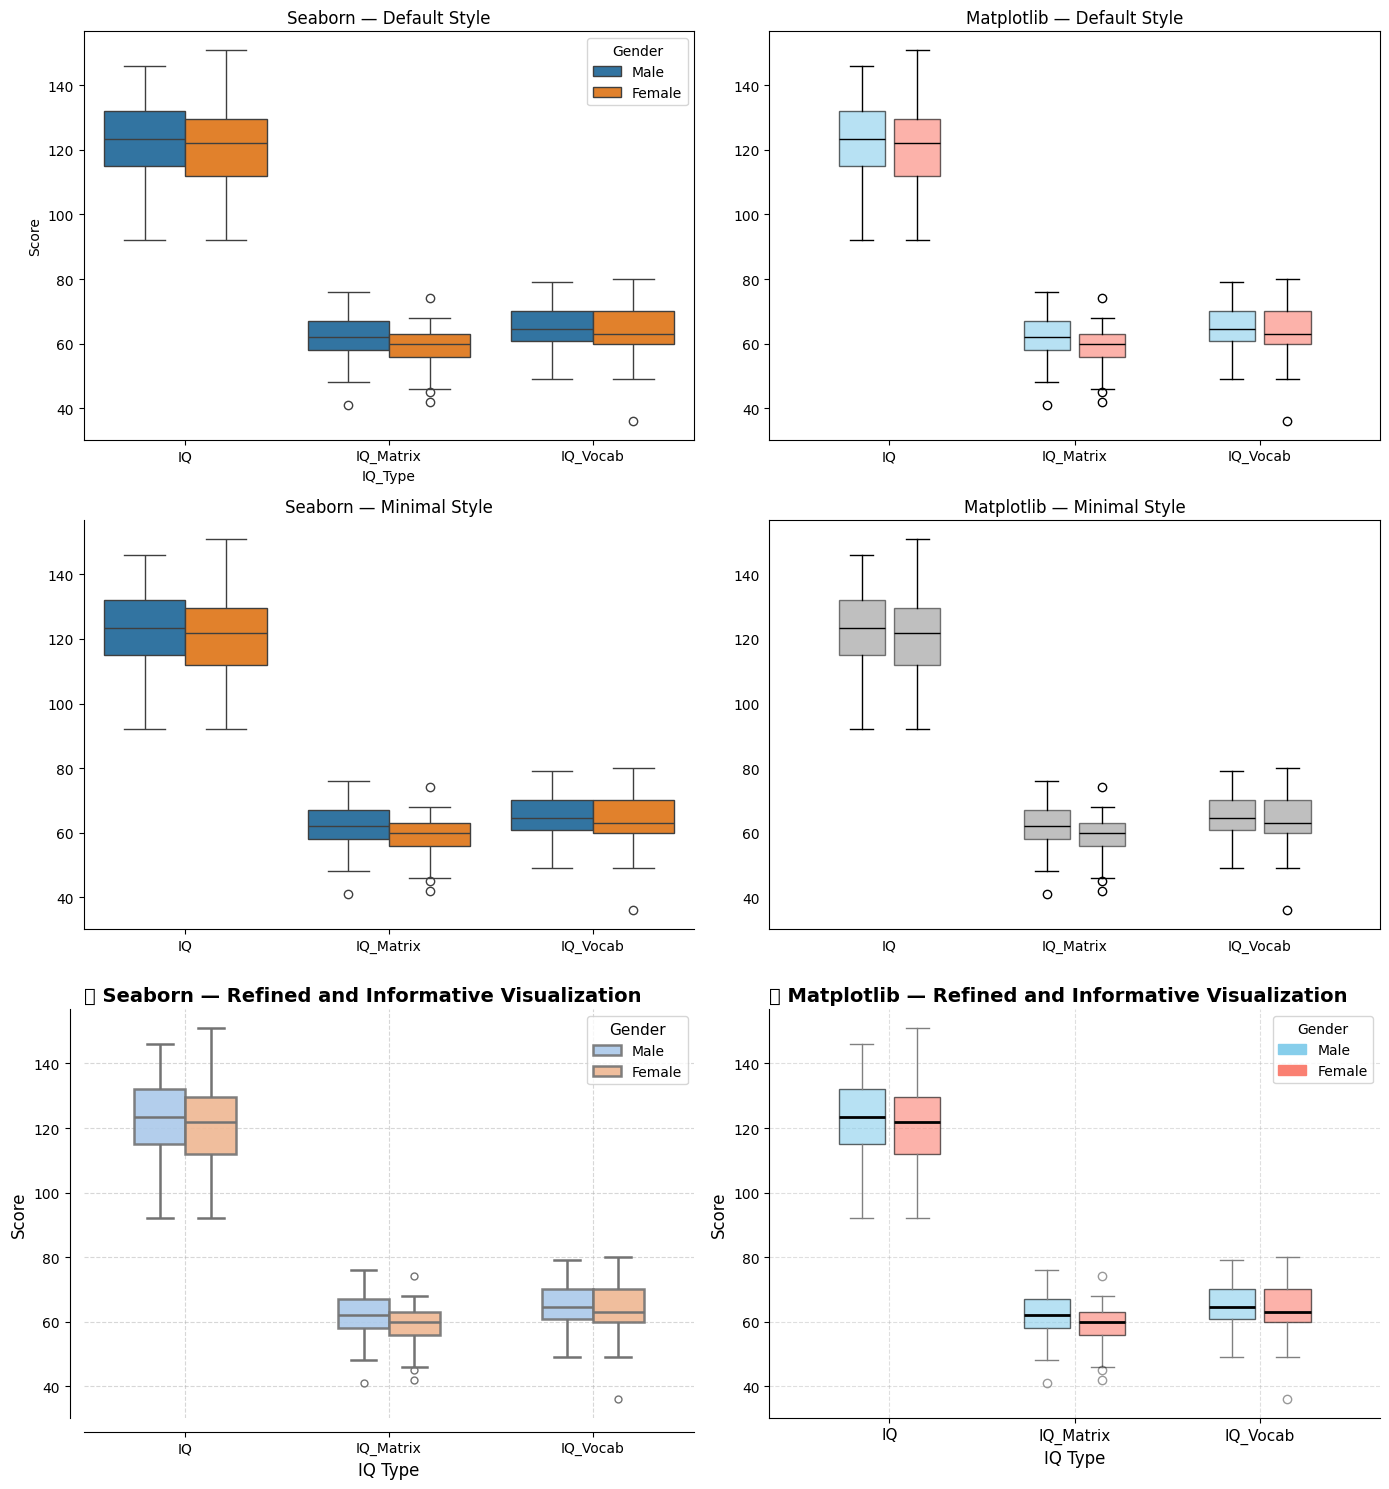

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Prepare data
df_melt = df_y.melt(id_vars='Gender',
                    value_vars=['IQ', 'IQ_Matrix', 'IQ_Vocab'],
                    var_name='IQ_Type', value_name='Score')

# Prepare data for Matplotlib (grouped manually)
grouped_data = df_y.groupby("Gender")[['IQ', 'IQ_Matrix', 'IQ_Vocab']]

# Setup side-by-side plots: Seaborn (left), Matplotlib (right)
fig, ax = plt.subplots(3, 2, figsize=(14, 15))

# --- Row 1: Default ---
# Seaborn
sns.boxplot(data=df_melt, x='IQ_Type', y='Score', hue='Gender', ax=ax[0, 0])
ax[0, 0].set_title("Seaborn — Default Style")

# Matplotlib
colors = {'Male': 'skyblue', 'Female': 'salmon'}
iq_types = ['IQ', 'IQ_Matrix', 'IQ_Vocab']
positions = [1, 2, 3]
width = 0.3

for i, gender in enumerate(['Male', 'Female']):
    data = [df_y[df_y["Gender"] == gender][col] for col in iq_types]
    ax[0, 1].boxplot(data, positions=[p + i * width for p in positions],
                     widths=0.25, patch_artist=True,
                     boxprops=dict(facecolor=colors[gender], alpha=0.6),
                     medianprops=dict(color='black'))
ax[0, 1].set_xticks([p + width/2 for p in positions])
ax[0, 1].set_xticklabels(iq_types)
ax[0, 1].set_title("Matplotlib — Default Style")

# --- Row 2: Minimal ---
sns.boxplot(data=df_melt, x='IQ_Type', y='Score', hue='Gender', ax=ax[1, 0])
ax[1, 0].set_title("Seaborn — Minimal Style")
ax[1, 0].legend_.remove()
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("")
ax[1, 0].grid(False)
sns.despine(ax=ax[1, 0])

for i, gender in enumerate(['Male', 'Female']):
    data = [df_y[df_y["Gender"] == gender][col] for col in iq_types]
    ax[1, 1].boxplot(data, positions=[p + i * width for p in positions],
                     widths=0.25, patch_artist=True,
                     boxprops=dict(facecolor='gray', alpha=0.5),
                     medianprops=dict(color='black'))
ax[1, 1].set_xticks([p + width/2 for p in positions])
ax[1, 1].set_xticklabels(iq_types)
ax[1, 1].set_title("Matplotlib — Minimal Style")
ax[1, 1].grid(False)
ax[1, 1].tick_params(left=False, bottom=False)

# --- Row 3: Refined ---
# 🎨 Seaborn refinement
sns.boxplot(
    data=df_melt, x='IQ_Type', y='Score', hue='Gender', ax=ax[2, 0],
    palette='pastel', width=0.5, linewidth=1.8, fliersize=5,
    boxprops=dict(alpha=0.9), dodge=True
)
ax[2, 0].set_title("🔍 Seaborn — Refined and Informative Visualization", fontsize=14, fontweight='bold', loc='left')
ax[2, 0].set_xlabel("IQ Type", fontsize=12)
ax[2, 0].set_ylabel("Score", fontsize=12)
ax[2, 0].legend(title="Gender", title_fontsize=11, fontsize=10, loc='upper right', frameon=True)
ax[2, 0].grid(True, linestyle='--', alpha=0.5)
sns.despine(ax=ax[2, 0], offset=10)

# 🎨 Matplotlib refinement
for i, gender in enumerate(['Male', 'Female']):
    data = [df_y[df_y["Gender"] == gender][col] for col in iq_types]
    ax[2, 1].boxplot(
        data, positions=[p + i * width for p in positions],
        widths=0.25, patch_artist=True,
        boxprops=dict(facecolor=colors[gender], alpha=0.6, edgecolor='black'),
        medianprops=dict(color='black', linewidth=2),
        whiskerprops=dict(color='gray'),
        capprops=dict(color='gray'),
        flierprops=dict(marker='o', color='gray', alpha=0.4)
    )

ax[2, 1].set_xticks([p + width/2 for p in positions])
ax[2, 1].set_xticklabels(iq_types, fontsize=11)
ax[2, 1].set_title("🔍 Matplotlib — Refined and Informative Visualization", fontsize=14, fontweight='bold', loc='left')
ax[2, 1].set_xlabel("IQ Type", fontsize=12)
ax[2, 1].set_ylabel("Score", fontsize=12)
ax[2, 1].legend(handles=[Patch(color=colors['Male'], label='Male'),
                        Patch(color=colors['Female'], label='Female')],
                title='Gender', loc='upper right')
ax[2, 1].grid(True, linestyle='--', alpha=0.4)
ax[2, 1].spines['top'].set_visible(False)
ax[2, 1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Volountary Exercise: Full Pipeline — Participant-Level Visualization with Time and Accuracy

**Instructions:**
- Use the `df_c` dataset (Child Numeracy Skills)
- Plot each participant's total time to complete the test as a **scatter plot**
- Overlay three horizontal lines (in red) indicating:
  - The **mean** completion time
  - The **first quartile** (25th percentile)
  - The **last quartile** (75th percentile)
- On the **same plot**, draw a second line (in a different color) that represents the **total number of correct responses** for each participant
- Bonus: Try adding a legend to clarify the plot
- Bonus: Try sorting participant in the dataset by class, can you detect any pattern in the plot
- Finally, explain what you see in the plot - what other kind of plot could you use for further investigation?

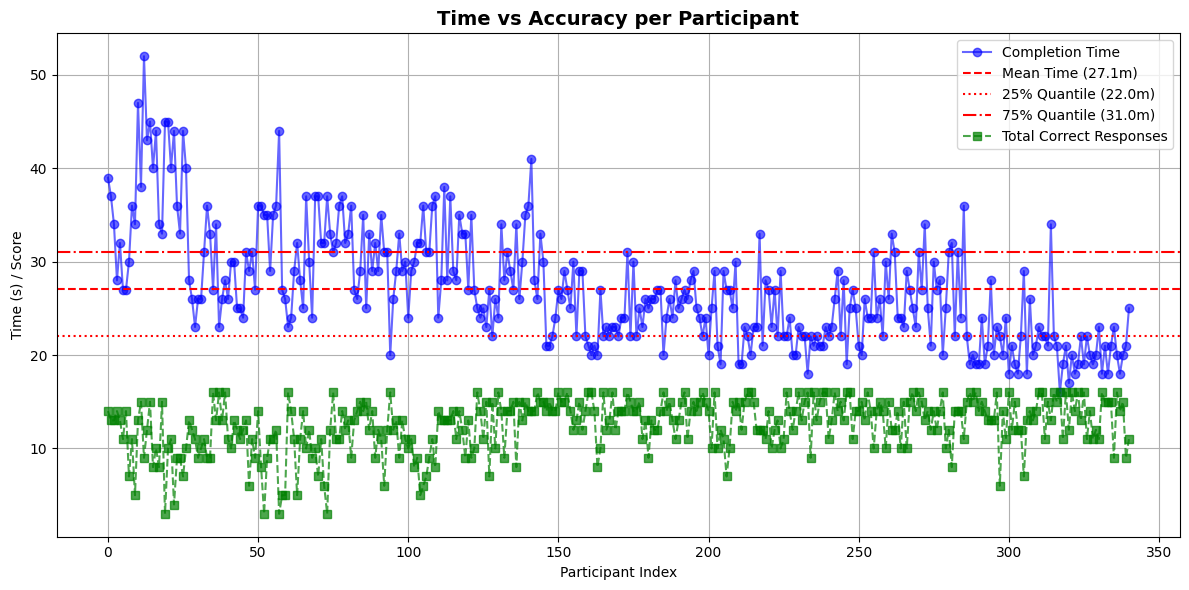

In [19]:
import numpy as np

# Calculate total correct responses
item_cols = [col for col in df_c.columns if col.startswith("addit") or col.startswith("subtr")]
df_c["total_correct"] = df_c[item_cols].sum(axis=1)

# Sort participants by index
df_sorted = df_c.sort_index()

# Extract values
x = np.arange(len(df_sorted))
times = df_sorted["time"]
correct = df_sorted["total_correct"]

# Compute statistics
mean_time = times.mean()
q1_time = times.quantile(0.25)
q3_time = times.quantile(0.75)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot participant times
ax.plot(x, times, label="Completion Time", color="blue", marker='o', linestyle='-', alpha=0.6)

# Overlay mean, Q1, Q3 lines
ax.axhline(mean_time, color="red", linestyle="--", label=f"Mean Time ({mean_time:.1f}m)")
ax.axhline(q1_time, color="red", linestyle=":", label=f"25% Quantile ({q1_time:.1f}m)")
ax.axhline(q3_time, color="red", linestyle="-.", label=f"75% Quantile ({q3_time:.1f}m)")

# Plot total correct responses
ax.plot(x, correct, label="Total Correct Responses", color="green", marker='s', linestyle='--', alpha=0.7)

# Customize plot
ax.set_title("Time vs Accuracy per Participant", fontsize=14, fontweight='bold')
ax.set_xlabel("Participant Index")
ax.set_ylabel("Time (s) / Score")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()